In [ ]:
# conda install -c conda-forge eli5

정확도 : 0.58, 정밀도 : 0.57, 재현율 : 0.58, f1-score : 0.58
정확도 : 0.55, 정밀도 : 0.56, 재현율 : 0.55, f1-score : 0.55


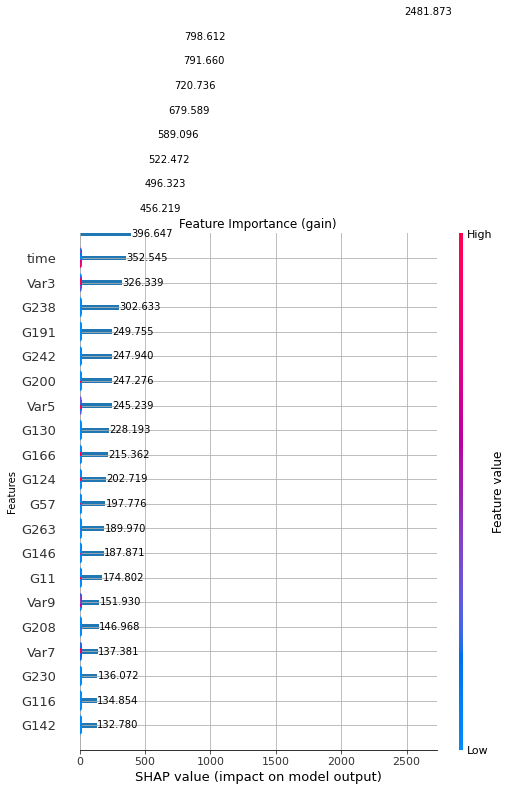

Weight,Feature
0.0990 ± 0.0504,time
0.0150 ± 0.0352,Var4
0.0130 ± 0.0102,G200
0.0130 ± 0.0273,Var2
0.0120 ± 0.0136,G18
0.0110 ± 0.0075,G75
0.0090 ± 0.0075,G6
0.0080 ± 0.0136,G112
0.0070 ± 0.0102,G148
0.0060 ± 0.0040,G284


In [48]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import shap
import eli5
from eli5.sklearn import PermutationImportance

import warnings

# import gc
import numpy as np

from BorutaShap import BorutaShap, load_data
# from xgboost import XGBClassifier


# from eli5.lightgbm import *
# from eli5.sklearn import *
# import eli5

warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (20,10)


'''
###########################################

Load CSV Dataset to DataFrame

###########################################
'''


time_table = pd.read_csv('Survival_time_event.csv', index_col=0)
clinic_table = pd.read_csv('Clinical_Variables.csv', index_col=0)
genetic_table = pd.read_csv('Genetic_alterations.csv', index_col=0)
survival_treatment_table = pd.read_csv('Label.csv', index_col=0)


'''
###########################################

Correlating Numerical Features of Time Data

-  Dropped Outlier Value

###########################################
'''


time_table_outlier = time_table.copy()
time_table_outlier.loc[time_table_outlier['time'] < 0, 'time'] = abs(time_table_outlier.loc[time_table_outlier['time'] < 0, 'time'])


'''
###########################################

Correlating Numerical Features of Clinic Data

-  Dropped Outlier Value

###########################################
'''


clinic_table_outlier = clinic_table.copy()

# drop outlier
for col in clinic_table_outlier.columns:
    for outlier in range(10,13):
        clinic_table_outlier = clinic_table_outlier.replace(outlier, 9)


'''
###########################################

Correlating Numerical Features of Clinic Data

- Normalization

###########################################
'''


clinic_table_normalization = clinic_table_outlier.copy()

# normalization
for col in clinic_table_normalization.columns:
    clinic_table_normalization[col] = (clinic_table_normalization[col] + 1)/10.0
    
    
'''
###########################################

Correlating Numerical Features of Genetic Data

- Normalization

###########################################
'''


genetic_table_normalization = genetic_table.copy()

# normalization
for col in genetic_table_normalization.columns:
    genetic_table_normalization[col] -= 0.5
    

'''
###########################################

Loading Dataset

###########################################
'''

input_dataset = pd.concat([survival_treatment_table, time_table_outlier, clinic_table_normalization ,genetic_table_normalization], axis=1)
input_dataset = input_dataset.drop(['event'], axis=1)

all_index = np.arange(1000)
train_data, test_data = input_dataset.iloc[all_index[:800],:], input_dataset.iloc[all_index[800:1000],:]
X_train = train_data.drop(['newlabel'], axis=1)
Y_train = train_data['newlabel']

X_test = test_data.drop(['newlabel'], axis=1)
Y_test = test_data['newlabel']


'''
###########################################

Model Test Function

###########################################
'''


def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    metrics(y_test,pred)
    

def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred,average='weighted')
    recall = recall_score(y_test,pred,average='weighted')
    f1 = f1_score(y_test,pred,average='weighted')
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}, f1-score : {0:.2f}'.format(accuracy,precision,recall,f1))


lgb_c = lgb.LGBMClassifier(n_estimators=100,num_leaves=64,n_jobs=-1,boost_from_average=False)
modeling(lgb_c,X_train,X_test,Y_train,Y_test)


'''
###########################################

Feature Selection

###########################################
'''

lgb_c = lgb.LGBMClassifier(n_estimators=100,num_leaves=64,n_jobs=-1,is_unbalance = True,boost_from_average=False)
modeling(lgb_c,X_train_over,X_test,Y_train_over,Y_test)


'''
###########################################

Method1

###########################################
'''


plt.rcParams["figure.figsize"] = (20,10)
ax = lgb.plot_importance(lgb_c, max_num_features=30, importance_type='gain')
ax.set(title=f'Feature Importance (gain)',xlabel='Feature Importance',ylabel='Features')


'''
###########################################

Method2

###########################################
'''

shap.initjs()
explainer = shap.TreeExplainer(lgb_c)
shap_values = explainer.shap_values(X_test)
fig = shap.summary_plot(shap_values[0], X_test)


'''
###########################################

Method3

###########################################
'''


perm = PermutationImportance(lgb_c, random_state=42).fit(X_test, Y_test)
explain_weights.explain_permutation_importance(perm, feature_names = X_test.columns.values, top=30)

In [39]:
lgb_c = lgb.LGBMClassifier(n_estimators=100,num_leaves=64,n_jobs=-1,is_unbalance = True,boost_from_average=False)
modeling(lgb_c,X_train_over,X_test,Y_train_over,Y_test)

정확도 : 0.55, 정밀도 : 0.56, 재현율 : 0.55, f1-score : 0.55


정확도 : 0.58, 정밀도 : 0.57, 재현율 : 0.58, f1-score : 0.58


[Text(0.5, 1.0, 'Feature Importance (gain)'),
 Text(0.5, 0, 'Feature Importance'),
 Text(0, 0.5, 'Features')]

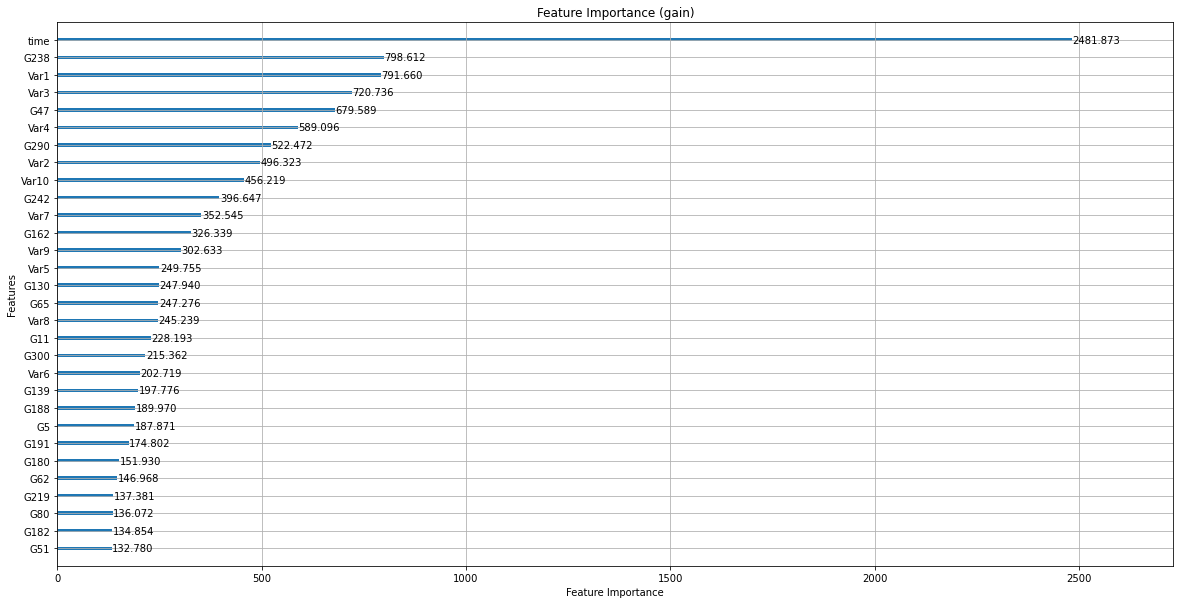

In [47]:
plt.rcParams["figure.figsize"] = (20,10)
ax = lgb.plot_importance(lgb_c, max_num_features=30, importance_type='gain')
ax.set(title=f'Feature Importance (gain)',xlabel='Feature Importance',ylabel='Features')

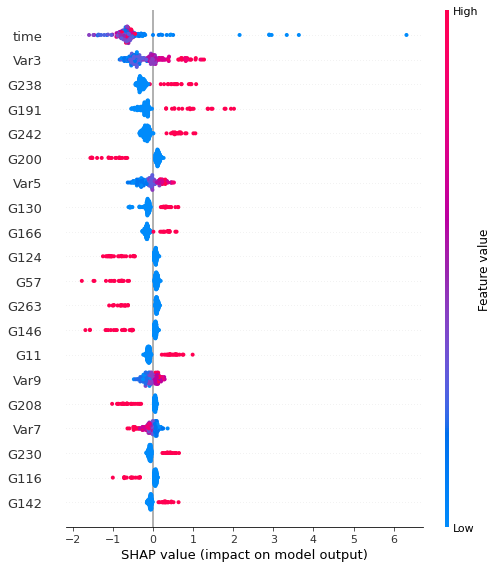

In [45]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(lgb_c)
shap_values = explainer.shap_values(X_test)
fig = shap.summary_plot(shap_values[0], X_test)

In [41]:
from eli5.lightgbm import *
from eli5.sklearn import *
import eli5

perm = PermutationImportance(lgb_c, random_state=42).fit(X_test, Y_test)
explain_weights.explain_permutation_importance(perm, feature_names = X_test.columns.values, top=30)

Weight,Feature
0.0990 ± 0.0504,time
0.0150 ± 0.0352,Var4
0.0130 ± 0.0102,G200
0.0130 ± 0.0273,Var2
0.0120 ± 0.0136,G18
0.0110 ± 0.0075,G75
0.0090 ± 0.0075,G6
0.0080 ± 0.0136,G112
0.0070 ± 0.0102,G148
0.0060 ± 0.0040,G284
